In [1]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_excel('Africa_1997_2019.xlsx')

In [6]:
df.describe()

,ISO,EVENT_ID_NO_CNTY,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,TIMESTAMP
count,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,180985.000000,1.809850e+05
mean,525.278415,5565.552935,2011.744250,1.137083,3.389734,3.301600,31.994022,5.969376,24.160134,1.267127,4.046628,1.552745e+09
std,256.145668,5824.631328,6.177757,0.432748,2.021412,2.924347,18.236190,16.154120,16.101983,0.517953,41.464101,6.738368e+05
min,12.000000,1.000000,1997.000000,1.000000,1.000000,0.000000,10.000000,-34.710000,-17.465000,1.000000,0.000000,1.552576e+09
25%,288.000000,1371.000000,2008.000000,1.000000,2.000000,1.000000,14.000000,-1.056000,13.160000,1.000000,0.000000,1.552577e+09
50%,694.000000,3781.000000,2014.000000,1.000000,3.000000,2.000000,28.000000,5.340000,29.083000,1.000000,0.000000,1.552577e+09
75%,716.000000,7618.000000,2016.000000,1.000000,5.000000,7.000000,47.000000,12.370000,34.111000,1.000000,1.000000,1.552578e+09
max,894.000000,28332.000000,2019.000000,3.000000,8.000000,8.000000,88.000000,37.274000,51.267000,3.000000,1369.000000,1.556572e+09


In [7]:
len(df)

180985

In [8]:
len(df.columns)

29

In [11]:
df.head()


,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,Douaouda,36.672,2.789,1,www.algeria-watch.org,National,5 January: Beheading of 5 citizens in Douaouda...,5,1552577681
1,12,ALG2,2,1997-01-02,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Relizane,Mazouna,NaN,Hassasna,36.133,0.883,1,www.algeria-watch.org,National,Two citizens were beheaded in Hassasna.,2,1552577681
2,12,ALG3,3,1997-01-03,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Saida,Youb,NaN,Hassi El Abed,34.966,-0.290,1,www.algeria-watch.org,National,Two citizens were killed in a raid on the vill...,2,1552577681
3,12,ALG4,4,1997-01-04,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Blida,Blida,NaN,Blida,36.469,2.829,1,www.algeria-watch.org,National,4 January: 16 citizens were murdered in the vi...,16,1552577681
4,12,ALG5,5,1997-01-05,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,Douaouda,36.672,2.789,1,www.algeria-watch.org,National,5 January: Killing of 18 citizens in the Olivi...,18,1552577681


In [51]:
df['notes_len'] = df['NOTES'].apply(lambda x: check_len(x))

In [53]:
def check_len(x):
    if isinstance(x, str)==True:
        return int(len(x))

In [56]:
df_data = df.set_index('EVENT_DATE')

In [67]:
year_notes_len = df_data.resample('Y')['notes_len'].mean()

In [68]:
year_notes_len = year_notes_len.reset_index()

In [59]:
import plotly_express as px

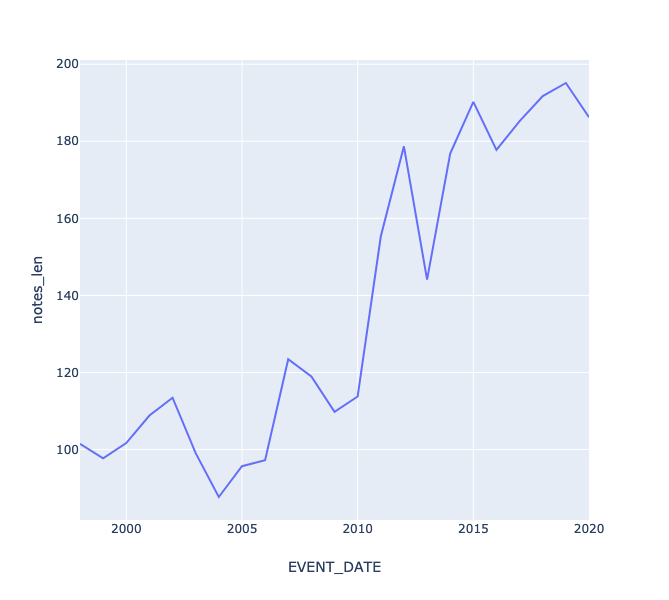

In [99]:
px.line(year_notes_len, x='EVENT_DATE', y='notes_len')

In [ ]:
notes_len_cty_yr = df.groupby(['REGION', 'YEAR'])['notes_len'].mean().reset_index()

In [94]:
notes_len_region_yr = df.groupby(['REGION', 'YEAR'])['notes_len'].mean().reset_index()

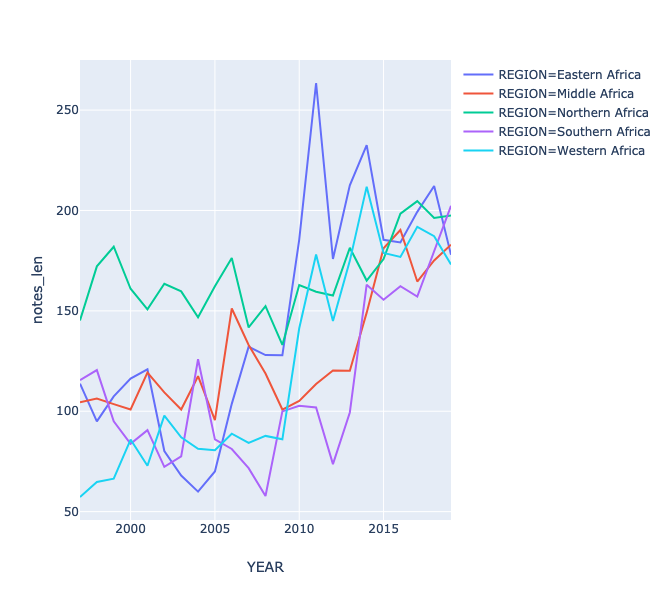

In [96]:
px.line(notes_len_region_yr, x='YEAR', y='notes_len', color='REGION')

In [101]:
nigeria = df[df['COUNTRY']=='Nigeria']

In [102]:
len(nigeria)

14184

In [110]:
nigeria_len = nigeria.groupby('YEAR').mean().reset_index()

In [111]:
nigeria_len

,YEAR,ISO,EVENT_ID_NO_CNTY,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,TIMESTAMP,notes_len
0,1997,566.0,74.647887,1.133803,3.718310,3.725352,37.359155,6.786775,5.545268,1.302817,3.373239,1.552578e+09,115.478873
1,1998,566.0,228.467532,1.110390,3.753247,3.454545,36.194805,7.156123,5.872877,1.311688,8.344156,1.552578e+09,127.922078
2,1999,566.0,415.465686,1.161765,3.789216,3.352941,35.686275,6.867529,5.911314,1.245098,8.862745,1.552594e+09,127.151961
3,2000,566.0,604.939759,1.102410,3.590361,3.957831,36.066265,7.579867,5.902175,1.156627,20.150602,1.552604e+09,119.518072
4,2001,566.0,754.324561,1.192982,3.657895,4.429825,37.614035,8.159412,7.340333,1.122807,19.245614,1.552578e+09,125.719298
5,2002,566.0,895.138158,1.184211,3.243421,4.394737,31.914474,7.880322,6.621520,1.184211,7.506579,1.552578e+09,103.072368
6,2003,566.0,1083.295567,1.088670,3.270936,4.512315,34.206897,7.374591,6.807828,1.206897,4.743842,1.552607e+09,94.339901
7,2004,566.0,1327.739130,1.054348,3.452899,3.869565,37.942029,7.630935,7.117728,1.199275,8.688406,1.552593e+09,74.612319
8,2005,566.0,1572.954545,1.101010,3.833333,2.909091,40.469697,7.118136,6.154268,1.126263,0.530303,1.552663e+09,51.294416
9,2006,566.0,1735.766667,1.041667,2.583333,4.141667,27.875000,6.304283,7.081100,1.175000,1.050000,1.552606e+09,64.083333


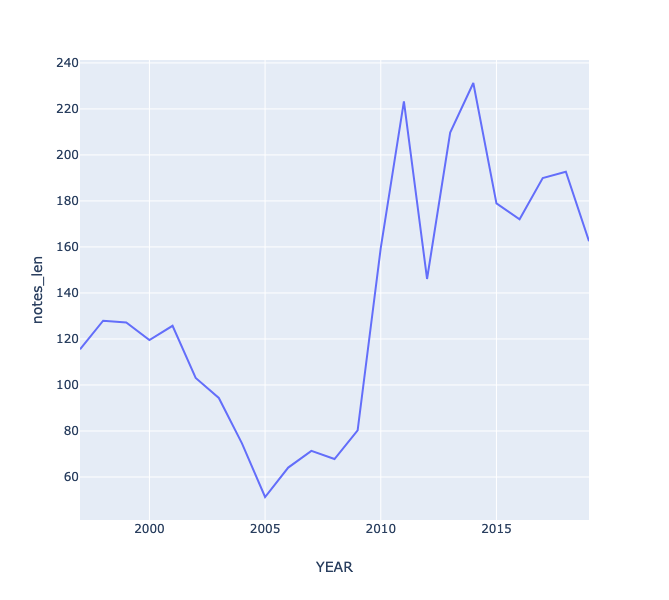

In [112]:
px.line(nigeria_len, x='YEAR', y='notes_len')

In [117]:
nigeria.head(2)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,notes_len
73740,566,NIG1,1,1997-01-07,1997,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Nigeria),NaN,3,Military Forces of Nigeria (1993-1999),NaN,1,13,Western Africa,Nigeria,Lagos,Lagos Island,NaN,Lagos,6.453,3.396,1,Agence France Presse,International,A blast believed to have been caused by a bomb...,2,1552577681,180.0
73741,566,NIG2,2,1997-01-08,1997,2,Battles,Armed clash,Ekori Ethnic Militia (Nigeria),NaN,4,Ekori Ethnic Militia (Nigeria),NaN,4,44,Western Africa,Nigeria,Cross River,Yakurr,NaN,Ugep,5.809,8.081,2,Agence France Presse,International,At least 20 people including a police sergeant...,1,1552577681,132.0


In [119]:
ni_cty_yr_len = nigeria[['COUNTRY', 'YEAR', 'notes_len']]

In [130]:
ni_cty_yr_len = ni_cty_yr_len.groupby('YEAR').mean().reset_index()

In [132]:
ni_cty_yr_len['REGION']= 'Nigeria'

In [134]:
ni_cty_yr_len = ni_cty_yr_len[['REGION', 'YEAR', 'notes_len']]

In [135]:
region_nigeria = notes_len_region_yr.append(ni_cty_yr_len)

In [136]:
region_nigeria.head()

,REGION,YEAR,notes_len
0,Eastern Africa,1997,113.759317
1,Eastern Africa,1998,94.948969
2,Eastern Africa,1999,107.397074
3,Eastern Africa,2000,116.262332
4,Eastern Africa,2001,120.887640


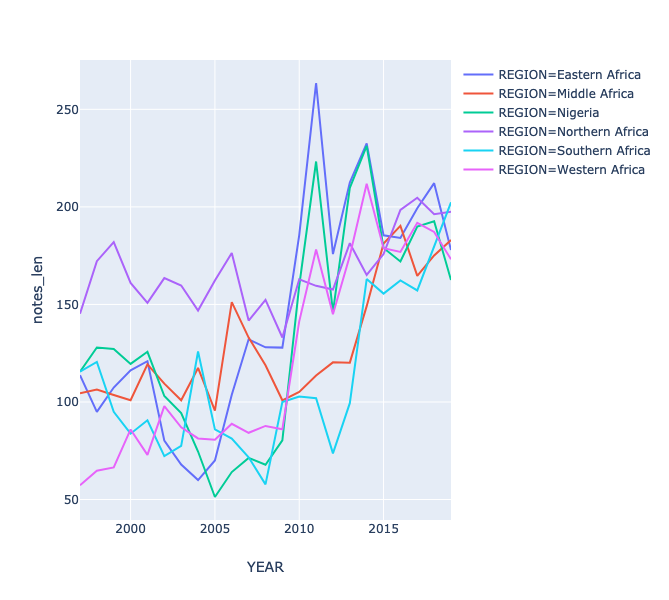

In [137]:
px.line(region_nigeria, x='YEAR', y='notes_len', color='REGION')